In [1]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
# We begin by importing all the necessary libraries needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

#ignore warning
import warnings
warnings.filterwarnings("ignore")
file_loc = r"C:\Users\USER\Desktop\Yeni klasör\credit_customers (1).xlsx"
credit_customers_data = pd.read_excel(file_loc)
credit_customers_data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [2]:
rows_col = credit_customers_data.shape
print("Total number of records in the dataset : ", rows_col[0])
print("Total number of columns in the dataset : ", rows_col[1])

Total number of records in the dataset :  1000
Total number of columns in the dataset :  21


In [3]:
credit_customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [4]:
n = 1
for (columnName, columnData) in credit_customers_data.iteritems():
    if columnData.dtype == 'O':
        print('S.no   : ', n)
        print('Name   : ', columnName)
        print('Unique : ', columnData.unique())
        print('No     : ',len(columnData.unique()))
        print()
        n+=1
    else:
        pass

S.no   :  1
Name   :  checking_status
Unique :  ['<0' '0<=X<200' 'no checking' '>=200']
No     :  4

S.no   :  2
Name   :  credit_history
Unique :  ['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']
No     :  5

S.no   :  3
Name   :  purpose
Unique :  ['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']
No     :  10

S.no   :  4
Name   :  savings_status
Unique :  ['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']
No     :  5

S.no   :  5
Name   :  employment
Unique :  ['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']
No     :  5

S.no   :  6
Name   :  personal_status
Unique :  ['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']
No     :  4

S.no   :  7
Name   :  other_parties
Unique :  ['none' 'guarantor' 'co applicant']
No     :  3

S.no   :  8
Name   :  property_magnitude
Unique :  ['real estate' 'life insurance' 'no known propert

In [5]:
credit_customers_data[['sex', 'marriage']] = credit_customers_data.personal_status.str.split(" ", expand = True)
credit_customers_data.drop(['personal_status'], axis=1, inplace = True)

In [6]:
credit_customers_data.head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,residence_since,...,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,sex,marriage
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,none,4.0,...,none,own,2.0,skilled,1.0,yes,yes,good,male,single
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,none,2.0,...,none,own,1.0,skilled,1.0,none,yes,bad,female,div/dep/mar
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,none,3.0,...,none,own,1.0,unskilled resident,2.0,none,yes,good,male,single
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,guarantor,4.0,...,none,for free,1.0,skilled,2.0,none,yes,good,male,single
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,none,4.0,...,none,for free,2.0,skilled,2.0,none,yes,bad,male,single


In [7]:
credit_customers_data['checking_status'].replace(['no checking', '<0', '0<=X<200', '>=200'], [0,1,2,3], inplace = True)
credit_customers_data['credit_history'].replace(['critical/other existing credit', 'delayed previously' , 'existing paid', 'no credits/all paid', 'all paid'], [0,1,2,2,2], inplace = True)
credit_customers_data['purpose'].replace(['business', 'new car','used car', 'education', 'retraining', 'other','domestic appliance','radio/tv','furniture/equipment','repairs'], [5,5,4,4,3,3,3,2,2,1], inplace = True)
credit_customers_data['savings_status'].replace(['no known savings', '<100','100<=X<500','500<=X<1000','>=1000'], [0,1,2,3,4], inplace = True)
credit_customers_data['employment'].replace(['unemployed', '<1','1<=X<4','4<=X<7','>=7'], [0,1,2,3,4], inplace = True)
credit_customers_data['other_parties'].replace(['none', 'co applicant', 'guarantor'], [0,1,2], inplace = True)
credit_customers_data['property_magnitude'].replace(['no known property', 'life insurance', 'car', 'real estate'], [0,1,2,3], inplace = True)
credit_customers_data['other_payment_plans'].replace(['none', 'stores', 'bank'], [0,1,1], inplace = True)
credit_customers_data['housing'].replace(['for free', 'rent', 'own'], [0,1,2], inplace = True)
credit_customers_data['job'].replace(['unemp/unskilled non res', 'unskilled resident', 'skilled', 'high qualif/self emp/mgmt'], [0,1,2,3], inplace = True)
credit_customers_data['own_telephone'].replace(['yes', 'none'], [1,0], inplace = True)
credit_customers_data['foreign_worker'].replace(['yes', 'no'], [1,0], inplace = True)
credit_customers_data['class'].replace(['good', 'bad'], [1,0], inplace = True)
credit_customers_data['sex'].replace(['male', 'female'], [1,0], inplace = True)
credit_customers_data['marriage'].replace(['single', 'div/sep','div/dep/mar','mar/wid'], [0,0,1,1], inplace = True)

In [8]:
credit_customers_data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,residence_since,...,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,sex,marriage
0,1,6.0,0,2,1169.0,0,4,4.0,0,4.0,...,0,2,2.0,2,1.0,1,1,1,1,0
1,2,48.0,2,2,5951.0,1,2,2.0,0,2.0,...,0,2,1.0,2,1.0,0,1,0,0,1
2,0,12.0,0,4,2096.0,1,3,2.0,0,3.0,...,0,2,1.0,1,2.0,0,1,1,1,0
3,1,42.0,2,2,7882.0,1,3,2.0,2,4.0,...,0,0,1.0,2,2.0,0,1,1,1,0
4,1,24.0,1,5,4870.0,1,2,3.0,0,4.0,...,0,0,2.0,2,2.0,0,1,0,1,0


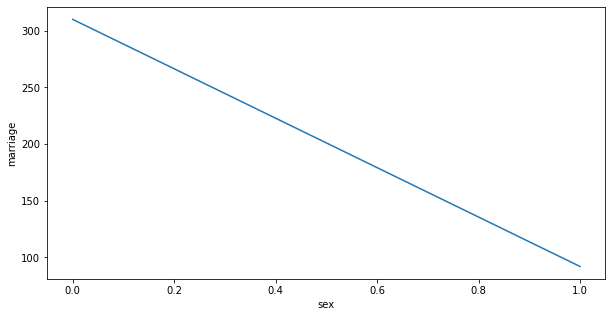

In [9]:
data2 = pd.DataFrame(credit_customers_data.groupby(['sex'])['marriage'].sum()).reset_index()
plt.figure(figsize=(10,5))
ax = sns.lineplot(x = 'sex', y='marriage', data = data2)

In [10]:
credit_customers_data.groupby('sex').sum().sort_values(by='marriage', ascending=False)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,residence_since,...,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,marriage
sex,,,,,,,,,,,,,,,,,,,,,
0,320,6026.0,446,984,892110.0,382,629,877.0,42,889.0,...,10169.0,50,487,411.0,569,324.0,108,303,201,310
1,681,14877.0,880,2326,2379148.0,808,1755,2096.0,103,1956.0,...,25377.0,136,1118,996.0,1335,831.0,296,660,499,92


In [11]:
credit_customers_data.dtypes

checking_status             int64
duration                  float64
credit_history              int64
purpose                     int64
credit_amount             float64
savings_status              int64
employment                  int64
installment_commitment    float64
other_parties               int64
residence_since           float64
property_magnitude          int64
age                       float64
other_payment_plans         int64
housing                     int64
existing_credits          float64
job                         int64
num_dependents            float64
own_telephone               int64
foreign_worker              int64
class                       int64
sex                         int64
marriage                    int64
dtype: object

In [12]:
print(credit_customers_data['class'].value_counts())

1    700
0    300
Name: class, dtype: int64


In [13]:
from sklearn.preprocessing import StandardScaler
X = credit_customers_data.drop(['class'], axis=1)
y = credit_customers_data['class']
std_scaler = StandardScaler()
Xa = std_scaler.fit_transform(X)

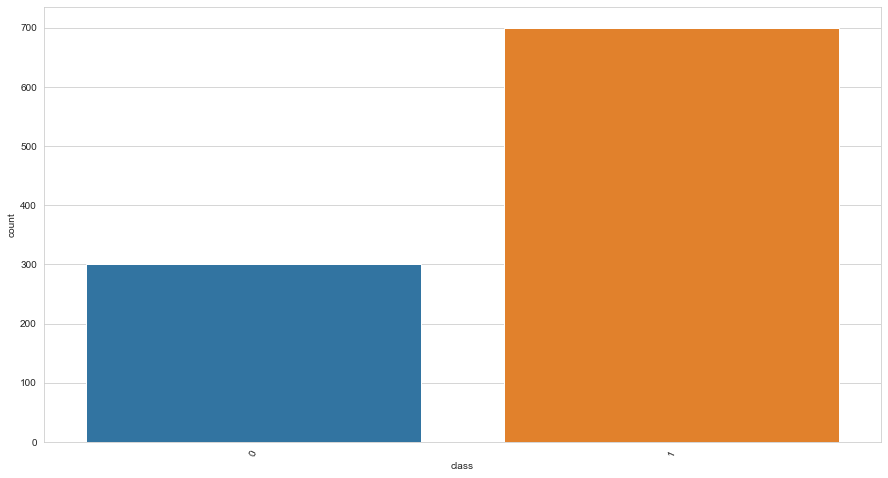

In [14]:
sns.set_style("whitegrid")
plt.figure(figsize = (15,8))
plt.xticks(rotation=65,size=10)
sns.countplot(x='class', data=credit_customers_data) 
plt.show()

In [15]:
X = pd.DataFrame(Xa, columns = X.columns)

In [16]:
credit_customers_data.columns


Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'other_parties', 'residence_since',
       'property_magnitude', 'age', 'other_payment_plans', 'housing',
       'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class', 'sex', 'marriage'],
      dtype='object')

Model Building and Selection

In [17]:
# splitting data into training and test data at 80% and 20% respectively
from sklearn.model_selection import train_test_split
xm_train, xm_test, ym_train, ym_test = train_test_split(X, y, train_size = 0.8, random_state = 100)

Building model with multiple linear regression

In [18]:
lin = lm.LinearRegression()
lin.fit(xm_train, ym_train)
y_pred = lin.predict(xm_test)
print("Mean Square Error: ", mean_squared_error(ym_test, y_pred))
print("Variance or r-squared: ", explained_variance_score(ym_test, y_pred))

Mean Square Error:  0.18387803810887224
Variance or r-squared:  0.09015987482634436


Building model with Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

rfr = RandomForestRegressor(n_estimators=13, random_state=0)
rfr.fit(xm_train, ym_train)
y_predicted = rfr.predict(xm_test)
print("Mean Square Error: ", mean_squared_error(ym_test, y_predicted))
print("Variance or r-squared: ", explained_variance_score(ym_test, y_predicted))

Mean Square Error:  0.16828402366863904
Variance or r-squared:  0.17582417582417587


Building model with Decision Tree Regressor

In [20]:
from sklearn import tree
from sklearn.metrics import mean_squared_error, explained_variance_score

dtr = tree.DecisionTreeRegressor()
dtr.fit(xm_train, ym_train)
ntree = dtr.predict(xm_test)
print("Mean Square Error: ", mean_squared_error(ym_test, ntree))
print("Variance or r-squared: ", explained_variance_score(ym_test, ntree))

Mean Square Error:  0.31
Variance or r-squared:  -0.5252976190476188


Tuning our model before deployment

In [21]:
# Tuning our model
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X, y)
print(grid_search)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')


In [22]:
# obtaining the best parameters
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [23]:
# obtaining the best estimators
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30)

In [24]:
# printing all MSE for each parameter combinations
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
     print(np.sqrt(-mean_score), params)

0.47187568984497036 {'max_features': 2, 'n_estimators': 3}
0.4364057744805859 {'max_features': 2, 'n_estimators': 10}
0.41188590653237944 {'max_features': 2, 'n_estimators': 30}
0.46642851065898144 {'max_features': 4, 'n_estimators': 3}
0.43024411675233865 {'max_features': 4, 'n_estimators': 10}
0.4117739401392198 {'max_features': 4, 'n_estimators': 30}
0.46785562825394 {'max_features': 6, 'n_estimators': 3}
0.4227883631321941 {'max_features': 6, 'n_estimators': 10}
0.414301285968986 {'max_features': 6, 'n_estimators': 30}
0.466309387043028 {'max_features': 8, 'n_estimators': 3}
0.4130617387267913 {'max_features': 8, 'n_estimators': 10}
0.4134945921989522 {'max_features': 8, 'n_estimators': 30}
0.47069688288276945 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.4273523136710506 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.4714045207910317 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.4223032086072755 {'bootstrap': False, 'max_features': 3, '

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

xm_train = sc.fit_transform(xm_train)
xm_test = sc.transform(xm_test)

In [26]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [27]:
def print_score(classifier,xm_train,ym_train,xm_test,ym_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(ym_train,classifier.predict(xm_train))))
        print('Classification Report:\n{}\n'.format(classification_report(ym_train,classifier.predict(xm_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(ym_train,classifier.predict(xm_train))))
        res = cross_val_score(classifier, xm_train, ym_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(ym_test,classifier.predict(xm_test))))
        print('Classification Report:\n{}\n'.format(classification_report(ym_test,classifier.predict(xm_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(ym_test,classifier.predict(xm_test))))

In [28]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(xm_train,ym_train)

LogisticRegression()

In [29]:
print_score(classifier,xm_train,ym_train,xm_test,ym_test,train=True)

Training results:

Accuracy Score: 0.7338

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.37      0.46       244
           1       0.76      0.89      0.82       556

    accuracy                           0.73       800
   macro avg       0.68      0.63      0.64       800
weighted avg       0.71      0.73      0.71       800


Confusion Matrix:
[[ 91 153]
 [ 60 496]]

Average Accuracy:	0.7137

Standard Deviation:	0.0265


In [30]:
print_score(classifier,xm_train,ym_train,xm_test,ym_test,train=False)

Test results:

Accuracy Score: 0.7000

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.27      0.33        56
           1       0.75      0.87      0.81       144

    accuracy                           0.70       200
   macro avg       0.60      0.57      0.57       200
weighted avg       0.67      0.70      0.67       200


Confusion Matrix:
[[ 15  41]
 [ 19 125]]



In [31]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=37)

classifier.fit(xm_train,ym_train)

SVC(random_state=37)

In [32]:
print_score(classifier,xm_train,ym_train,xm_test,ym_test,train=True)

Training results:

Accuracy Score: 0.8588

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.57      0.71       244
           1       0.84      0.99      0.91       556

    accuracy                           0.86       800
   macro avg       0.89      0.78      0.81       800
weighted avg       0.87      0.86      0.85       800


Confusion Matrix:
[[138 106]
 [  7 549]]

Average Accuracy:	0.7325

Standard Deviation:	0.0341


In [33]:
print_score(classifier,xm_train,ym_train,xm_test,ym_test,train=False)

Test results:

Accuracy Score: 0.7550

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.34      0.44        56
           1       0.78      0.92      0.84       144

    accuracy                           0.76       200
   macro avg       0.70      0.63      0.64       200
weighted avg       0.73      0.76      0.73       200


Confusion Matrix:
[[ 19  37]
 [ 12 132]]



In [34]:
from sklearn.neighbors import KNeighborsClassifier as KNN

classifier = KNN()
classifier.fit(xm_train,ym_train)

KNeighborsClassifier()

In [35]:
print_score(classifier,xm_train,ym_train,xm_test,ym_test,train=True)

Training results:

Accuracy Score: 0.8087

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.55      0.64       244
           1       0.82      0.92      0.87       556

    accuracy                           0.81       800
   macro avg       0.79      0.74      0.75       800
weighted avg       0.80      0.81      0.80       800


Confusion Matrix:
[[134 110]
 [ 43 513]]

Average Accuracy:	0.7200

Standard Deviation:	0.0528


In [36]:
print_score(classifier,xm_train,ym_train,xm_test,ym_test,train=False)

Test results:

Accuracy Score: 0.6850

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.34      0.38        56
           1       0.76      0.82      0.79       144

    accuracy                           0.69       200
   macro avg       0.59      0.58      0.58       200
weighted avg       0.67      0.69      0.67       200


Confusion Matrix:
[[ 19  37]
 [ 26 118]]



In [37]:
from sklearn.naive_bayes import GaussianNB as NB

classifier = NB()
classifier.fit(xm_train,ym_train)

GaussianNB()

In [38]:
print_score(classifier,xm_train,ym_train,xm_test,ym_test,train=True)

Training results:

Accuracy Score: 0.7375

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.63      0.59       244
           1       0.83      0.79      0.81       556

    accuracy                           0.74       800
   macro avg       0.70      0.71      0.70       800
weighted avg       0.75      0.74      0.74       800


Confusion Matrix:
[[153  91]
 [119 437]]

Average Accuracy:	0.7113

Standard Deviation:	0.0482


In [39]:
print_score(classifier,xm_train,ym_train,xm_test,ym_test,train=False)

Test results:

Accuracy Score: 0.6800

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.57      0.50        56
           1       0.81      0.72      0.76       144

    accuracy                           0.68       200
   macro avg       0.63      0.65      0.63       200
weighted avg       0.71      0.68      0.69       200


Confusion Matrix:
[[ 32  24]
 [ 40 104]]



In [40]:
from sklearn.tree import DecisionTreeClassifier as DT

classifier = DT(criterion='entropy',random_state=37)
classifier.fit(xm_train,ym_train)

DecisionTreeClassifier(criterion='entropy', random_state=37)

In [41]:
print_score(classifier,xm_train,ym_train,xm_test,ym_test,train=True)

Training results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       244
           1       1.00      1.00      1.00       556

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


Confusion Matrix:
[[244   0]
 [  0 556]]

Average Accuracy:	0.6675

Standard Deviation:	0.0448


In [42]:
print_score(classifier,xm_train,ym_train,xm_test,ym_test,train=False)

Test results:

Accuracy Score: 0.7150

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.54      0.51        56
           1       0.81      0.78      0.80       144

    accuracy                           0.71       200
   macro avg       0.65      0.66      0.66       200
weighted avg       0.72      0.71      0.72       200


Confusion Matrix:
[[ 30  26]
 [ 31 113]]



In [43]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 37)
classifier.fit(xm_train, ym_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=37)

In [44]:
print_score(classifier,xm_train,ym_train,xm_test,ym_test,train=True)

Training results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       244
           1       1.00      1.00      1.00       556

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


Confusion Matrix:
[[244   0]
 [  0 556]]

Average Accuracy:	0.7388

Standard Deviation:	0.0328


In [45]:
print_score(classifier,xm_train,ym_train,xm_test,ym_test,train=False)

Test results:

Accuracy Score: 0.7650

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.43      0.51        56
           1       0.80      0.90      0.85       144

    accuracy                           0.77       200
   macro avg       0.71      0.66      0.68       200
weighted avg       0.75      0.77      0.75       200


Confusion Matrix:
[[ 24  32]
 [ 15 129]]



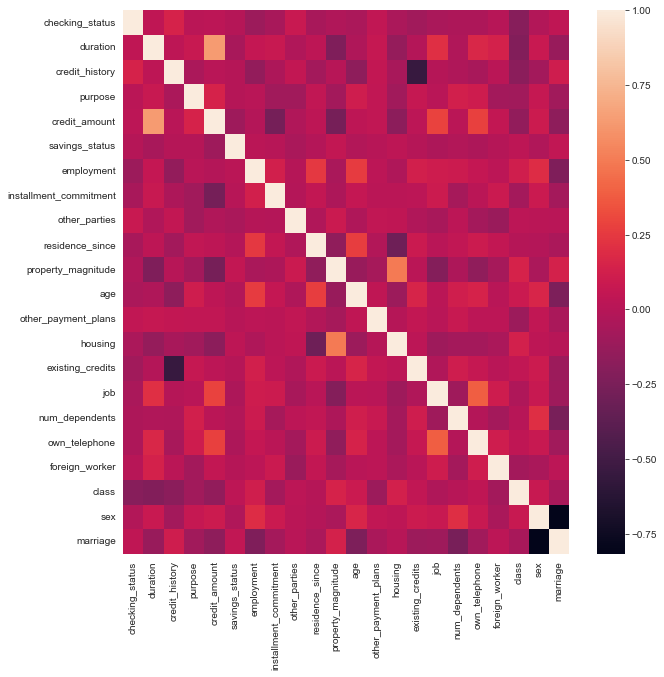

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

sns.heatmap(credit_customers_data.corr())

# df.drop(['credit_amount','duration'],axis=1,inplace=True)

plt.show()

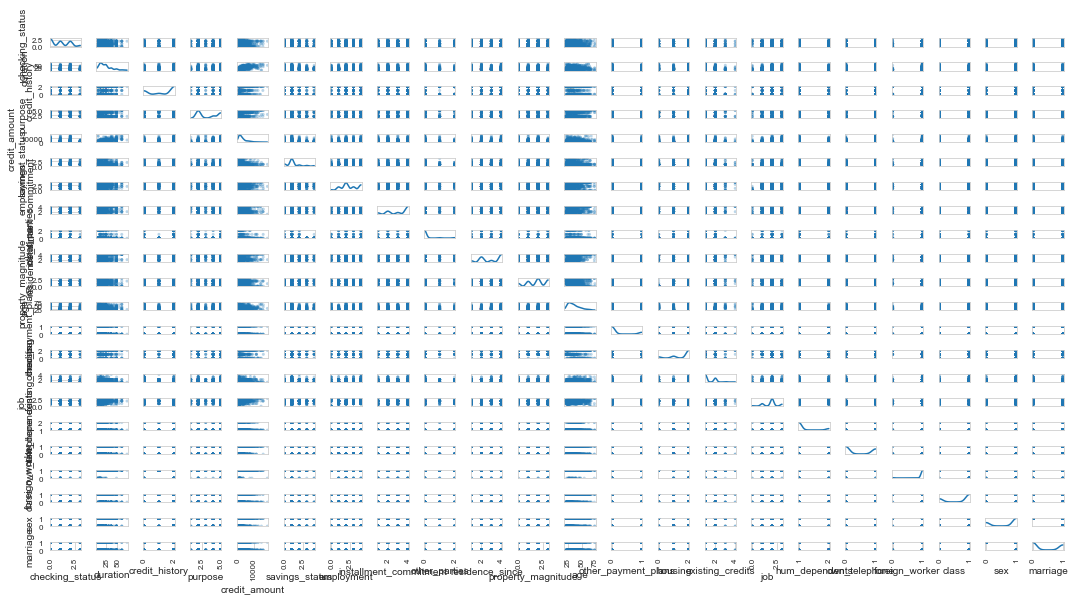

In [47]:
pd.plotting.scatter_matrix(credit_customers_data, alpha=0.3,figsize=(15,8),diagonal='kde' )
plt.tight_layout()